# 拟合学习目标

## 直接求导
最小二乘法

复杂函数不可导/难以求导


## 随机下降

In [2]:
import random
import numpy as np

def loss(y_hat, y):
    return np.mean((y_hat - y) ** 2)

min_loss = float('inf')
best_k, bes_b = None, None

x = np.array([1.1,6.4,5.5,7.8])
y = np.array([3.4,5.6,4.5,9.0])

for step in range(1000):
    min_v, max_v = -100, 100
    # 设置min max - 范围越大，约有找到最优解的可能，计算量也随之上升
    # 随机 - 体现在对于weight的选取上
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i  + b for rm_i in x]
    current_loss = loss(y_hats, y)
    # 下降 - 体现在随着loss降低，选取拟合程度更好的weight
    # 由于是随机选取，没有选择最优的下降方向，需要pass dataset很多次，才有概率获得下降
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 81 * rm + 87, 此时loss是: 293046.3424999999
在第1步，我们获得了函数 f(rm) = 28 * rm + 84, 此时loss是: 54843.38250000001
在第4步，我们获得了函数 f(rm) = -21 * rm + -56, 此时loss是: 32136.9225
在第6步，我们获得了函数 f(rm) = -7 * rm + 22, 此时loss是: 774.2325000000001
在第57步，我们获得了函数 f(rm) = 1 * rm + -16, 此时loss是: 271.6925
在第399步，我们获得了函数 f(rm) = 1 * rm + -1, 此时loss是: 3.9425


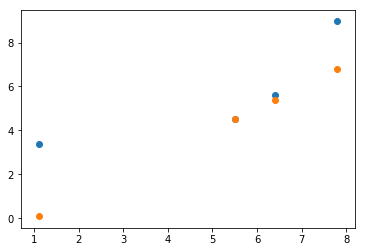

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

初始时刻，更新频繁

后续得不到有效的更新指导

对于一个期望的足够小的loss，计算慢

### 如何更有效地更新梯度?

## 梯度下降
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i $$

$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i)$$

In [5]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k * x + b - y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k * x + b - y)

In [6]:
k, b = random.random(), random.random()
min_loss = float('inf')
best_k, bes_b = None, None
learning_rate = 1e-2

for step in range(2000):
    # *-1代表梯度下降，寻找最小loss
    k, b = k + (-1 * partial_k(k, b, x, y) * learning_rate), b + (-1 * partial_b(k, b, x, y) * learning_rate)
    y_hats = k * x + b
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 0.8524965218316558 * rm + 0.821265088931651, 此时loss是: 1.6275590276707743
在第1步，我们获得了函数 f(rm) = 0.8717165200863318 * rm + 0.8286801488825257, 此时loss是: 1.5989638860661242
在第2步，我们获得了函数 f(rm) = 0.8773590672690262 * rm + 0.8339480278158967, 此时loss是: 1.5944025744086254
在第3步，我们获得了函数 f(rm) = 0.8786941258548208 * rm + 0.8385237242636001, 此时loss是: 1.5922744852603778
在第4步，我们获得了函数 f(rm) = 0.8786637624743392 * rm + 0.8428690606894267, 此时loss是: 1.5904037386977692
在第5步，我们获得了函数 f(rm) = 0.8782017152259866 * rm + 0.8471306481783069, 此时loss是: 1.5885710724389306
在第6步，我们获得了函数 f(rm) = 0.8776043249603678 * rm + 0.8513550568312381, 此时loss是: 1.5867543113483789
在第7步，我们获得了函数 f(rm) = 0.8769656373288259 * rm + 0.8555571058987351, 此时loss是: 1.5849511331705266
在第8步，我们获得了函数 f(rm) = 0.8763154941631608 * rm + 0.8597415374985625, 此时loss是: 1.5831612160440958
在第9步，我们获得了函数 f(rm) = 0.8756633605023962 * rm + 0.8639098953556226, 此时loss是: 1.5813844402493922
在第10步，我们获得了函数 f(rm) = 0.875012234282665 * rm + 0.86

在第1249步，我们获得了函数 f(rm) = 0.7002463117853833 * rm + 1.9815639220563535, 此时loss是: 1.3411349520680618
在第1250步，我们获得了函数 f(rm) = 0.7002395463489216 * rm + 1.9816070271895465, 此时loss是: 1.3411347620357155
在第1251步，我们获得了函数 f(rm) = 0.7002328057889222 * rm + 1.9816499738254678, 此时loss是: 1.3411345733982938
在第1252步，我们获得了函数 f(rm) = 0.7002260900139147 * rm + 1.9816927625469105, 此时loss是: 1.3411343861455602
在第1253步，我们获得了函数 f(rm) = 0.7002193989327646 * rm + 1.9817353939345252, 此时loss是: 1.3411342002673492
在第1254步，我们获得了函数 f(rm) = 0.7002127324546729 * rm + 1.9817778685668272, 此时loss是: 1.3411340157535694
在第1255步，我们获得了函数 f(rm) = 0.7002060904891743 * rm + 1.9818201870202048, 此时loss是: 1.3411338325942075
在第1256步，我们获得了函数 f(rm) = 0.7001994729461362 * rm + 1.9818623498689265, 此时loss是: 1.3411336507793206
在第1257步，我们获得了函数 f(rm) = 0.7001928797357573 * rm + 1.9819043576851498, 此时loss是: 1.3411334702990394
在第1258步，我们获得了函数 f(rm) = 0.7001863107685666 * rm + 1.981946211038928, 此时loss是: 1.3411332911435672
在第1259步，我们获得了函数 f(rm)

在第1935步，我们获得了函数 f(rm) = 0.6985533727592009 * rm + 1.9923502715586843, 此时loss是: 1.341109228987708
在第1936步，我们获得了函数 f(rm) = 0.6985528322476422 * rm + 1.9923537153605537, 此时loss是: 1.3411092277747496
在第1937步，我们获得了函数 f(rm) = 0.6985522937235406 * rm + 1.992357146499588, 此时loss是: 1.341109226570695
在第1938步，我们获得了函数 f(rm) = 0.6985517571795883 * rm + 1.992360565022348, 此时loss是: 1.3411092253754795
在第1939步，我们获得了函数 f(rm) = 0.6985512226085044 * rm + 1.9923639709752239, 此时loss是: 1.3411092241890357
在第1940步，我们获得了函数 f(rm) = 0.6985506900030346 * rm + 1.9923673644044348, 此时loss是: 1.3411092230113029
在第1941步，我们获得了函数 f(rm) = 0.6985501593559514 * rm + 1.9923707453560306, 此时loss是: 1.3411092218422138
在第1942步，我们获得了函数 f(rm) = 0.6985496306600538 * rm + 1.992374113875891, 此时loss是: 1.3411092206817066
在第1943步，我们获得了函数 f(rm) = 0.6985491039081673 * rm + 1.9923774700097276, 此时loss是: 1.3411092195297183
在第1944步，我们获得了函数 f(rm) = 0.6985485790931437 * rm + 1.9923808138030836, 此时loss是: 1.3411092183861868
在第1945步，我们获得了函数 f(rm) = 0

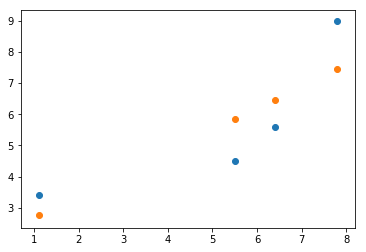

In [7]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

### 复杂函数可以由简单函数复合而成
$$ f(x) = k2 * \sigma(k_1 * x + b_1) + b2 $$

$$ \sigma(x) = \frac{1}{1 + e^(-x)} $$ 

### 面向越来越越复杂的函数？计算机如何求导？